In [4]:
# uncomment if gensim is installed
#!pip install gensim
import gensim
# Need the interactive Tools for Matplotlib
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE

In [102]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    #close_words = model.similar_by_word(word)
    close_words = model.similar_by_word(word, topn=30, restrict_vocab=None)
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')

    plt.xlim(x_coords.min()+0.005, x_coords.max()+0.005)
    plt.ylim(y_coords.min()+0.005, y_coords.max()+0.005)
    plt.show()

<IPython.core.display.Javascript object>


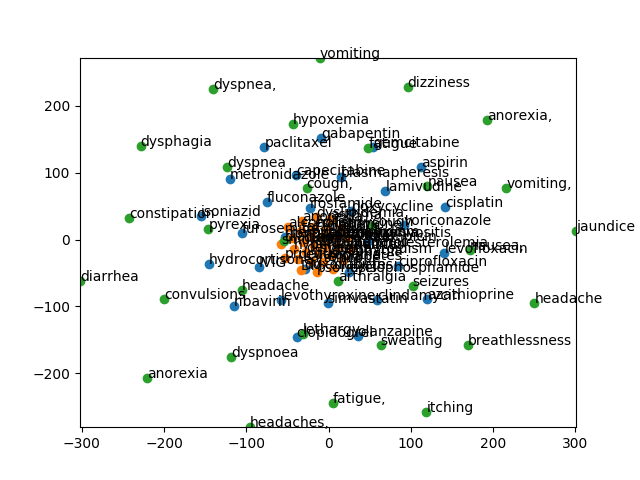

In [103]:
display_closestwords_tsnescatterplot(model, 'aspirin')



In [104]:
display_closestwords_tsnescatterplot(model, 'diabetes')

In [105]:
display_closestwords_tsnescatterplot(model, 'dyspnea')

In [33]:
model.similar_by_word('diabetes', topn=50, restrict_vocab=None)

[(u'diabetes,', 0.8456690311431885),
 (u'psoriasis', 0.8361797332763672),
 (u'neutropenia', 0.8076825141906738),
 (u'schizophrenia', 0.8028925657272339),
 (u'epilepsy', 0.7981104850769043),
 (u'obesity', 0.7951691150665283),
 (u'hyperthyroidism', 0.7831668257713318),
 (u'neutropenic', 0.7748287916183472),
 (u'mellitus', 0.7719711661338806),
 (u'hyperlipidemia', 0.7719079256057739),
 (u'asthma', 0.7711338996887207),
 (u'migraine', 0.7708967924118042),
 (u'DM', 0.7705787420272827),
 (u'pruritus', 0.7642746567726135),
 (u'smoking,', 0.762062668800354),
 (u'tetanus', 0.7612876892089844),
 (u'alcoholism,', 0.7608709335327148),
 (u'dermatomyositis', 0.7607980966567993),
 (u'anorexia', 0.7590056657791138),
 (u'hypothyroidism,', 0.7585749626159668),
 (u'diarrhea', 0.7582793831825256),
 (u'anemia', 0.7567197680473328),
 (u'hypercholesterolemia', 0.75660240650177),
 (u'longstanding', 0.7524930238723755),
 (u'dyslipidemia', 0.7510244846343994),
 (u'dysphagia', 0.7502983808517456),
 (u'syncope', 0

In [3]:
import os
# import modules & set up logging
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
 
sentences = [['first', 'sentence'], ['second', 'sentence']]
# train word2vec on the two sentences
model = gensim.models.Word2Vec(sentences, min_count=1)

2018-05-05 20:51:59,892 : INFO : collecting all words and their counts
2018-05-05 20:51:59,894 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-05 20:51:59,898 : INFO : collected 3 word types from a corpus of 4 raw words and 2 sentences
2018-05-05 20:51:59,899 : INFO : Loading a fresh vocabulary
2018-05-05 20:51:59,900 : INFO : min_count=1 retains 3 unique words (100% of original 3, drops 0)
2018-05-05 20:51:59,901 : INFO : min_count=1 leaves 4 word corpus (100% of original 4, drops 0)
2018-05-05 20:51:59,902 : INFO : deleting the raw counts dictionary of 3 items
2018-05-05 20:51:59,904 : INFO : sample=0.001 downsamples 3 most-common words
2018-05-05 20:51:59,905 : INFO : downsampling leaves estimated 0 word corpus (5.7% of prior 4)
2018-05-05 20:51:59,961 : INFO : estimated required memory for 3 words and 100 dimensions: 3900 bytes
2018-05-05 20:51:59,963 : INFO : resetting layer weights
2018-05-05 20:51:59,964 : INFO : training model with 3 workers o

In [5]:
class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for fname in os.listdir(self.dirname):
            for line in open(os.path.join(self.dirname, fname)):
                yield line.split()
sentences = MySentences('/home/naveen/Desktop/NLP_project/april_finalweek/coimbined data') # a memory-friendly iterator
#output=MySentences('/home/naveen/Desktop/NLP_project/word2vec_model/output/11597317.txt')


In [6]:
model = gensim.models.Word2Vec(sentences , min_count=1, size=300, window=1,workers=1)

2018-05-05 20:52:15,584 : INFO : collecting all words and their counts
2018-05-05 20:52:15,638 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-05 20:52:16,543 : INFO : PROGRESS: at sentence #10000, processed 184986 words, keeping 23261 word types
2018-05-05 20:52:17,290 : INFO : PROGRESS: at sentence #20000, processed 361214 words, keeping 35929 word types
2018-05-05 20:52:18,047 : INFO : PROGRESS: at sentence #30000, processed 548871 words, keeping 46610 word types
2018-05-05 20:52:18,725 : INFO : PROGRESS: at sentence #40000, processed 733607 words, keeping 56085 word types
2018-05-05 20:52:19,462 : INFO : PROGRESS: at sentence #50000, processed 916430 words, keeping 64979 word types
2018-05-05 20:52:20,283 : INFO : PROGRESS: at sentence #60000, processed 1096215 words, keeping 73009 word types
2018-05-05 20:52:21,039 : INFO : PROGRESS: at sentence #70000, processed 1269205 words, keeping 79499 word types
2018-05-05 20:52:21,726 : INFO : PROGRESS: a

2018-05-05 20:52:37,068 : INFO : PROGRESS: at sentence #720000, processed 5236101 words, keeping 199914 word types
2018-05-05 20:52:37,739 : INFO : PROGRESS: at sentence #730000, processed 5410370 words, keeping 204778 word types
2018-05-05 20:52:38,565 : INFO : PROGRESS: at sentence #740000, processed 5594211 words, keeping 209549 word types
2018-05-05 20:52:39,303 : INFO : PROGRESS: at sentence #750000, processed 5776806 words, keeping 214183 word types
2018-05-05 20:52:40,087 : INFO : PROGRESS: at sentence #760000, processed 5962362 words, keeping 218580 word types
2018-05-05 20:52:40,818 : INFO : PROGRESS: at sentence #770000, processed 6129989 words, keeping 222978 word types
2018-05-05 20:52:41,010 : INFO : PROGRESS: at sentence #780000, processed 6179422 words, keeping 224685 word types
2018-05-05 20:52:41,026 : INFO : PROGRESS: at sentence #790000, processed 6189422 words, keeping 225530 word types
2018-05-05 20:52:41,043 : INFO : PROGRESS: at sentence #800000, processed 619942

2018-05-05 20:53:30,096 : INFO : EPOCH 2 - PROGRESS: at 7.17% examples, 208737 words/s, in_qsize 1, out_qsize 0
2018-05-05 20:53:31,134 : INFO : EPOCH 2 - PROGRESS: at 17.16% examples, 205498 words/s, in_qsize 1, out_qsize 0
2018-05-05 20:53:32,144 : INFO : EPOCH 2 - PROGRESS: at 40.02% examples, 203239 words/s, in_qsize 1, out_qsize 0
2018-05-05 20:53:33,166 : INFO : EPOCH 2 - PROGRESS: at 53.68% examples, 204784 words/s, in_qsize 1, out_qsize 0
2018-05-05 20:53:34,191 : INFO : EPOCH 2 - PROGRESS: at 55.38% examples, 208569 words/s, in_qsize 1, out_qsize 0
2018-05-05 20:53:35,209 : INFO : EPOCH 2 - PROGRESS: at 56.95% examples, 211065 words/s, in_qsize 1, out_qsize 0
2018-05-05 20:53:36,234 : INFO : EPOCH 2 - PROGRESS: at 58.68% examples, 214123 words/s, in_qsize 2, out_qsize 0
2018-05-05 20:53:37,242 : INFO : EPOCH 2 - PROGRESS: at 60.37% examples, 216421 words/s, in_qsize 2, out_qsize 0
2018-05-05 20:53:38,270 : INFO : EPOCH 2 - PROGRESS: at 61.97% examples, 217501 words/s, in_qsize

2018-05-05 20:54:41,168 : INFO : EPOCH 4 - PROGRESS: at 72.08% examples, 238148 words/s, in_qsize 2, out_qsize 0
2018-05-05 20:54:42,195 : INFO : EPOCH 4 - PROGRESS: at 73.72% examples, 238638 words/s, in_qsize 2, out_qsize 0
2018-05-05 20:54:43,207 : INFO : EPOCH 4 - PROGRESS: at 75.38% examples, 239139 words/s, in_qsize 2, out_qsize 0
2018-05-05 20:54:44,240 : INFO : EPOCH 4 - PROGRESS: at 80.68% examples, 238558 words/s, in_qsize 1, out_qsize 0
2018-05-05 20:54:45,272 : INFO : EPOCH 4 - PROGRESS: at 90.83% examples, 238017 words/s, in_qsize 1, out_qsize 0
2018-05-05 20:54:46,290 : INFO : EPOCH 4 - PROGRESS: at 92.50% examples, 238516 words/s, in_qsize 1, out_qsize 0
2018-05-05 20:54:47,319 : INFO : EPOCH 4 - PROGRESS: at 94.10% examples, 238407 words/s, in_qsize 2, out_qsize 0
2018-05-05 20:54:48,328 : INFO : EPOCH 4 - PROGRESS: at 95.83% examples, 238546 words/s, in_qsize 1, out_qsize 0
2018-05-05 20:54:49,358 : INFO : EPOCH 4 - PROGRESS: at 97.58% examples, 239140 words/s, in_qsiz

In [23]:
#model.save('word2vec.txt')
model.wv.save_word2vec_format('w2v.txt')
#model.save('word2vec.bin')

2018-05-02 01:23:47,868 : INFO : storing 274929x300 projection weights into w2v.txt


In [24]:
words = list(model.wv.vocab)
print len(words)

274929


In [3]:
model.similarity('clinical', 'medical')

0.6345986941684432

In [25]:
model.similarity('Dr', 'doctor')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.49242245424688147

In [1]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('/home/naveen/Desktop/NLP_project/april/w2v.txt', binary=False)

In [2]:
model.similarity('brain', 'nerve')

0.5146803558910922

In [10]:
model.similarity('hand', 'leg')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.861129014753065

In [11]:
model.similarity('head', 'tail')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.7037199354601515

In [7]:
model.similar_by_word('diabetes')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.
2018-05-02 00:01:11,600 : INFO : precomputing L2-norms of word weight vectors


[('diabetes,', 0.8534467220306396),
 ('neutropenia', 0.8136982321739197),
 ('psoriasis', 0.8061525821685791),
 ('epilepsy', 0.8024754524230957),
 ('anemia', 0.8003379106521606),
 ('virilization', 0.7883362770080566),
 ('obesity', 0.7838950157165527),
 ('hyperthyroidism', 0.7808146476745605),
 ('schizophrenia', 0.7794439792633057),
 ('shock', 0.7758049964904785)]

In [16]:
model.similar_by_word('aspirin')

[(u'azathioprine', 0.9462924003601074),
 (u'rifampicin', 0.9273101687431335),
 (u'capecitabine', 0.9266180992126465),
 (u'doxorubicin', 0.9192758798599243),
 (u'fluconazole', 0.9159504175186157),
 (u'paclitaxel', 0.9153574109077454),
 (u'levothyroxine', 0.9136757850646973),
 (u'isoniazid', 0.9126784205436707),
 (u'metronidazole', 0.9125295877456665),
 (u'cisplatin', 0.9109864234924316)]

In [17]:
model.similar_by_word('dyspnea')

[(u'fatigue', 0.9339001774787903),
 (u'diarrhea', 0.9236364364624023),
 (u'nausea', 0.9189014434814453),
 (u'arthralgia', 0.9147469997406006),
 (u'fatigue,', 0.913451075553894),
 (u'dizziness', 0.9126315116882324),
 (u'headaches,', 0.9122133851051331),
 (u'dyspnea,', 0.9094935655593872),
 (u'dysphagia', 0.9079700112342834),
 (u'cough', 0.9061559438705444)]

In [13]:
model.similar_by_word('tumour')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('tumor', 0.9052654504776001),
 ('tumor,', 0.8775678873062134),
 ('lesion,', 0.8406990170478821),
 ('neoplasm', 0.8403520584106445),
 ('leiomyoma', 0.8247789144515991),
 ('lesion', 0.8222931623458862),
 ('malignancy', 0.8214960098266602),
 ('melanoma', 0.8131464123725891),
 ('nodule', 0.7954155206680298),
 ('lymphoma', 0.7918500304222107)]

In [14]:
model.similar_by_vector('football')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  """Entry point for launching an IPython kernel.


[('Russell\xe2\x80\x99s', 0.879406213760376),
 ('marathon', 0.8772517442703247),
 ('three-hour', 0.8587519526481628),
 ('12-hour', 0.8569892644882202),
 ('depletive', 0.8449633121490479),
 ('1mg', 0.8436294198036194),
 ('rugby', 0.8408870697021484),
 ('6-hour', 0.8408655524253845),
 ('sorafenib,', 0.8405486941337585),
 ('Philips', 0.8401902914047241)]

In [15]:
model.similarity('head', 'football')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.2798817905020613

In [16]:
model.similar_by_word('skin')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('cutaneous', 0.724398136138916),
 ('purpuric', 0.7069134712219238),
 ('mucosal', 0.6927722096443176),
 ('bony', 0.6872425079345703),
 ('perianal', 0.6759754419326782),
 ('wound', 0.6750578284263611),
 ('scalp', 0.6748840808868408),
 ('tongue', 0.6591818332672119),
 ('mucocutaneous', 0.6526055335998535),
 ('gingival', 0.6526055335998535)]

In [17]:
print(model.wv['the']).shape

(300,)


In [18]:
# get the most common words
print(model.wv.index2word[0], model.wv.index2word[1], model.wv.index2word[2])

('the', 'of', 'and')


In [4]:
model.similar_by_word('drug')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.
2018-04-28 21:19:22,932 : INFO : precomputing L2-norms of word weight vectors


[('substance', 0.8206042051315308),
 ('drugs', 0.7901003956794739),
 ('medication', 0.7741473913192749),
 ('steroids', 0.7651453018188477),
 ('alcohol', 0.7592407464981079),
 ('corticosteroids', 0.7542625665664673),
 ('steroid', 0.7542299628257751),
 ('cocaine', 0.7493764162063599),
 ('rituximab', 0.7405992746353149),
 ('antibiotic', 0.7398706674575806)]

# google news

In [5]:
from gensim.models import Word2Vec